# Kerr-cat qubit

In this notebook, we simulate the hamiltonian given in https://arxiv.org/abs/1907.12131:
\begin{equation}
\hat{H}_{\mathrm{cat}} / \hbar=-K \hat{a}^{\dagger 2} \hat{a}^2+\epsilon_2\left(\hat{a}^{\dagger 2}+\hat{a}^2\right),
\end{equation}
using QuTiP. 

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
from qutip import *

# animation
from matplotlib import animation
from matplotlib.animation import PillowWriter


# for 3d interactive display of the bloch sphere
from kaleidoscope import bloch_sphere
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
from qiskit.quantum_info import Statevector, partial_trace
print("done")




done


In [2]:
k = 2*pi                  # Kerr-nonlinearity
t = linspace(0, 1.0, 201) # time
N = 3                       # qubits (photon number)
epsilon = 1

# start with a coherent state with alpha=2.0
initial_state = coherent(N, 2.0)

a = destroy(N)               # annihilation operator
# Kerr Hamiltonian
H = -k * a.dag() * a.dag() * a * a + epsilon*(a.dag() * a.dag() + a * a)
print(initial_state)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.35051893]
 [-0.18298953]
 [ 0.91850493]]


In [3]:
# evolve the state under the influence of the kerr hamiltonian. 
# pass an empty list as expecation value operators argument 
# full state of the system is described by result.states
result = mesolve(H, initial_state, t, [], [])
states = result.states


evolve (https://qutip.org/docs/latest/apidoc/functions.html#module-qutip.mesolve, https://qutip.org/docs/latest/guide/dynamics/dynamics-time.html):

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat{H}/ \\hbar = -K \\hat{a}^{\\dagger 2}\\hat{a}^2 +\\epsilon(\\hat{a}^{\\dagger 2}+\\hat{a}^2) $'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

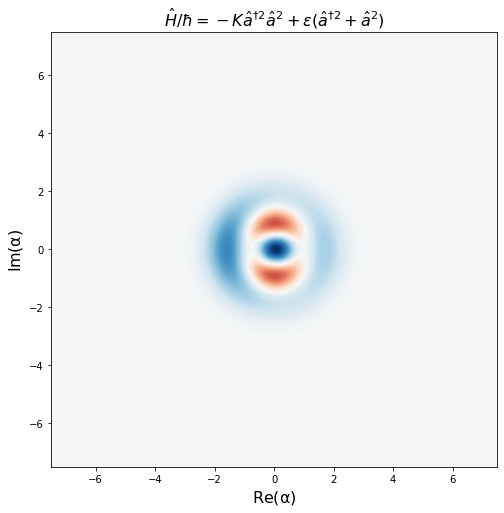

In [47]:
def plot_wigner(rho, animate=0, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for
    a harmonic oscillator mode.
    
    https://github.com/jrjohansson/qutip-lectures/blob/master/Lecture-14-Kerr-nonlinearities.ipynb
    https://qutip.org/docs/4.0.2/modules/qutip/visualization.html
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8,8))

    if isket(rho):
        rho = ket2dm(rho)
        
    
    xvec = linspace(-7.5,7.5,200)

    W = wigner(rho, xvec, xvec)
    wlim = abs(W).max()

    plot = ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel(r'$\rm{Re}(\alpha)$', fontsize=16)
    ax.set_ylabel(r'$\rm{Im}(\alpha)$', fontsize=16)
    
    if animate == 1:
        return plot.collections
        
    return fig, ax


fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_title(r"$\hat{H}/ \hbar = -K \hat{a}^{\dagger 2}\hat{a}^2 +\epsilon(\hat{a}^{\dagger 2}+\hat{a}^2) $",  fontsize=16)
plot_wigner(result.states[0], fig=fig, ax=ax)

## Animation

In [48]:
def update(n): 
    return plot_wigner(result.states[n], animate=1, fig=fig, ax=ax)

fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.set_title(r"$\hat{H}/ \hbar = -K \hat{a}^{\dagger 2}\hat{a}^2 +\epsilon(\hat{a}^{\dagger 2}+\hat{a}^2) $",  fontsize=16)


anim = animation.FuncAnimation(fig, update, frames=len(result.states), blit=True)

anim.save(r'C:\Users\Majd\Desktop\Dartmouth\1-Cources\Fitz-Group\Simulation\animation-kerr-coherent-state.gif', writer = PillowWriter(fps=10))

plt.close(fig)
print("done")

done
